# <center>***Exploratory Analysis of Ireland Weather***<center>


*********************************


![WEATHER](https://i.pinimg.com/564x/1f/8e/8f/1f8e8f16b0be992424f3f5b849706e8b.jpg)

##### Author: Gabriela Domiciano Avellar
##### Project: Programming for Data Analytics




## Project: Analysis of Weather Forecast Data in Ireland

This project showcases how command-line tools and  scripting, and automation can be utilized to manage and process weather forecast data in Ireland. The data was coleceted from [Historical Data](https://www.met.ie/climate/available-data/historical-data) and  [Today's Weather Athenry](https://data.gov.ie/dataset/todays-weather-athenry), The goal is to understand and analyze forecast data, providing detailed climate insights.


******************************

In [467]:

# Import required packages:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [468]:
# Exploratory Analysis of the DataSet: 'nui_galway.csv'
# Let's take a look at the Dataset.
nui_df = pd.read_csv('/Users/gabrieladomicianoavellar/Desktop/PFDA_project/data/nui_galway.csv')
print(nui_df)

       Year  Month  Day  Max (°F)  Min (°F)  Max (°C)  Min (°C)
0      1851      1    1       NaN       NaN       NaN       NaN
1      1851      1    2       NaN       NaN       NaN       NaN
2      1851      1    3       NaN       NaN       NaN       NaN
3      1851      1    4       NaN       NaN       NaN       NaN
4      1851      1    5       NaN       NaN       NaN       NaN
...     ...    ...  ...       ...       ...       ...       ...
41937  1965     10   27       NaN       NaN      14.8      12.1
41938  1965     10   28       NaN       NaN      13.0       8.6
41939  1965     10   29       NaN       NaN      14.0       6.8
41940  1965     10   30       NaN       NaN      11.4       9.0
41941  1965     10   31       NaN       NaN      14.3       7.0

[41942 rows x 7 columns]


In [469]:
# Calculate descriptive statistics, and saves it to a CSV file called 'summary.csv'
nui_df.describe().T.to_csv('data/summary.csv')

- **Year**: Data covers the period 1851 to 1965.
- **Month**: Includes all months.
- **Day**: Covers days 1 to 31.
- **Max (°F)**: Temperatures range from 4°F to 89°F.
- **Min (°F)**: Temperatures range from 11°F to 77°F.
- **Max (°C)**: Highs from -15.6°C to 31.7°C.
- **Min (°C)**: Lows from -11.7°C to 25.0°C.


In [470]:

Low_df = pd.DataFrame(nui_df)

# Removing rows with missing values in the minimum temperature column
df_cleaned = Low_df.dropna(subset=["Min (°C)"])

# Finding the row with the lowest minimum temperature
temp_min_row = df_cleaned.loc[df_cleaned["Min (°C)"].idxmin()]

lowest_temp_year = temp_min_row["Year"]
lowest_temp_month = temp_min_row["Month"]
lowest_temp_value_c = temp_min_row["Min (°C)"]

print(f"The lowest temperature was {lowest_temp_value_c:.2f}°C, registered in the month {lowest_temp_month} of the year {lowest_temp_year}.")


The lowest temperature was -11.70°C, registered in the month 1.0 of the year 1945.0.


In [471]:
Low_df = pd.DataFrame(nui_df)

# Removing rows with missing values in the minimum temperature column
df_cleaned = Low_df.dropna(subset=["Max (°C)"])

# Finding the row with the highest minimum temperature
temp_max_row = df_cleaned.loc[df_cleaned["Max (°C)"].idxmax()]

# Resultado
highest_temp_year = temp_max_row["Year"]
highest_temp_month = temp_max_row["Month"]
highest_temp_value_c = temp_max_row["Max (°C)"]

print(f"The highest temperature was {highest_temp_value_c:.2f}°C, registered in the month {highest_temp_month} of the year {highest_temp_year}.")


The highest temperature was 31.70°C, registered in the month 7.0 of the year 1921.0.


In [472]:

# Removing rows with missing values in the maximum temperature column and creating a new copy to avoid warnings
df_cleaned = nui_df.dropna(subset=["Max (°C)"]).copy()

# Creating a date column using 'Year', 'Month', and 'Day' for easier temporal analysis
df_cleaned.loc[:, 'Date'] = pd.to_datetime(df_cleaned[['Year', 'Month', 'Day']])

# Sorting the DataFrame by date to ensure data is in chronological order
df_cleaned = df_cleaned.sort_values('Date').reset_index(drop=True)

# Calculating the sum of maximum temperatures for each rolling 7-day window
df_cleaned['7_day_sum'] = df_cleaned['Max (°C)'].rolling(window=7).sum()

# Finding the row with the highest 7-day sum of maximum temperatures
hottest_week_row = df_cleaned.loc[df_cleaned['7_day_sum'].idxmax()]

# Determining the start and end dates of the hottest week
hottest_week_end = hottest_week_row['Date']
hottest_week_start = hottest_week_end - pd.Timedelta(days=6)

# Extracting the 7 days of the hottest week
hottest_week_df = df_cleaned[
    (df_cleaned['Date'] >= hottest_week_start) & (df_cleaned['Date'] <= hottest_week_end)
]

# Displaying the 7 days and their temperatures
print(f"The hottest week was from {hottest_week_start.strftime('%Y-%m-%d')} to {hottest_week_end.strftime('%Y-%m-%d')}.")
print("Temperatures for the 7 days:")

print(hottest_week_df[['Date', 'Max (°C)', 'Min (°C)']])




The hottest week was from 1934-07-06 to 1934-07-12.
Temperatures for the 7 days:
            Date  Max (°C)  Min (°C)
22633 1934-07-06      25.0      15.0
22634 1934-07-07      26.1      15.6
22635 1934-07-08      28.3      13.3
22636 1934-07-09      30.0      13.3
22637 1934-07-10      31.1      15.6
22638 1934-07-11      31.1      13.3
22639 1934-07-12      30.6      17.2


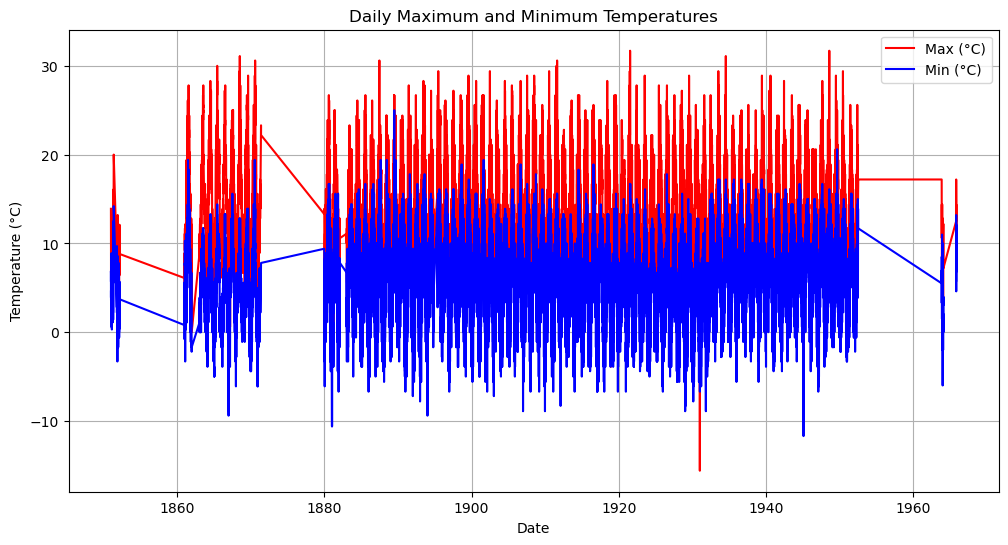

In [473]:

# Daily max and min temperatures
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Date'], df_cleaned['Max (°C)'], label='Max (°C)', color='red')
plt.plot(df_cleaned['Date'], df_cleaned['Min (°C)'], label='Min (°C)', color='blue')
plt.title('Daily Maximum and Minimum Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()


In [474]:
# Exploratory Analysis of the DataSet: 'station_details.csv'
# Let's take a look at the Dataset.
station_df = pd.read_csv('/Users/gabrieladomicianoavellar/Desktop/PFDA_project/data/station_details.csv', on_bad_lines='skip')
print(station_df)


       county  station name                            name  height(m)  \
0      Antrim          5880                 LH_RATHLIN_WEST         10   
1      Carlow          4415             TULLOW (Waterworks)         76   
2      Carlow          2414                     BORRIS G.S.         85   
3      Carlow          1214          CARLOW (SUGAR FACTORY)         58   
4      Carlow           115             HACKETSTOWN RECTORY        182   
...       ...           ...                             ...        ...   
2075  Wicklow          9820                   M.LOUGH OULER        457   
2076  Wicklow          2415           GLEN IMAAL (For.Stn.)        213   
2077  Wicklow          2420             OLDBRIDGE (Oakview)        335   
2078  Wicklow          9915  M.GLEN IMAAL(BALLINABARNY FOR)        421   
2079  Wicklow          2424      ENNISKERRY (BALLYMAN HSE.)        107   

      easting  northing  latitude  longitude open year close year  
0      309200    451800  55.30083   -6.2802

In [475]:
# Extracting the unique counties
unique_counties = station_df['county'].unique()

# Displaying the list of counties
print("List of Counties:")
for county in unique_counties:
    print(county)

# lists of counties with weather station


List of Counties:
Antrim
Carlow
Cavan
Clare
Cork
Donegal
Dublin
Galway
Kerry
Kildare
Kilkenny
Laois
Leitrim
Limerick
Longford
Louth
Mayo
Meath
Monaghan
Offaly
Roscommon
Sligo
Tipperary
Waterford
Westmeath
Wexford
Wicklow


In [476]:
# Filter rows where 'close year' is not null
closed_stations_df = station_df[station_df['close year'].notna()]

# Displaying the counties and corresponding station names
print("Counties with Closed Stations and Station Names:")
for index, row in closed_stations_df.iterrows():
    print(f"County: {row['county']}, Station Name: {row['station name']}")


Counties with Closed Stations and Station Names:
County: Antrim, Station Name: 5880
County: Carlow, Station Name: 4415
County: Carlow, Station Name: 2414
County: Carlow, Station Name: 1214
County: Carlow, Station Name: 115
County: Carlow, Station Name: 4214
County: Carlow, Station Name: 3614
County: Carlow, Station Name: 3315
County: Carlow, Station Name: 3115
County: Carlow, Station Name: 9914
County: Carlow, Station Name: 6114
County: Carlow, Station Name: 2214
County: Carlow, Station Name: 514
County: Carlow, Station Name: 1414
County: Carlow, Station Name: 6014
County: Carlow, Station Name: 375
County: Carlow, Station Name: 5914
County: Carlow, Station Name: 4515
County: Carlow, Station Name: 1014
County: Carlow, Station Name: 5314
County: Carlow, Station Name: 4814
County: Carlow, Station Name: 7414
County: Carlow, Station Name: 6214
County: Carlow, Station Name: 2015
County: Carlow, Station Name: 515
County: Carlow, Station Name: 2115
County: Carlow, Station Name: 1815
County: Ca

In [477]:
# Exploratory Analysis of the DataSet: 'all_yearly.csv'
# Let's take a look at the Dataset.
allyear_df = pd.read_csv('/Users/gabrieladomicianoavellar/Desktop/PFDA_project/data/all_yearly.csv')
print(allyear_df)

                station_id  year  n_rain   R5mm  R10mm  R20mm   SDII  PRCPTOT  \
0                  ATHENRY  2012     275    NaN    NaN    NaN    NaN      NaN   
1                  ATHENRY  2013     365   78.0   33.0    9.0  6.703   1112.7   
2                  ATHENRY  2014     365   96.0   35.0    5.0  6.468   1235.3   
3                  ATHENRY  2015     365  116.0   50.0   10.0  7.527   1543.1   
4                  ATHENRY  2016     366   76.0   23.0    3.0  5.623   1045.8   
...                    ...   ...     ...    ...    ...    ...    ...      ...   
1736  VALENTIA OBSERVATORY  2019     365  117.0   59.0   11.0  8.039   1664.0   
1737  VALENTIA OBSERVATORY  2020     366  124.0   64.0   20.0  9.283   1912.3   
1738  VALENTIA OBSERVATORY  2021     365  101.0   47.0   17.0  7.700   1524.6   
1739  VALENTIA OBSERVATORY  2022     365  109.0   60.0   19.0  8.786   1651.7   
1740  VALENTIA OBSERVATORY  2023     365  124.0   68.0   20.0  9.016   1911.4   

       CDD    CWD  ...    T

This dataset contains weather data from different weather stations over the years, including precipitation, temperature, and various climate indices. Below is an explanation of the columns.


- station_id: The name of the weather station.
- year: The year of the recorded data.
- n_rain: The number of days with precipitation in that year.
- R5mm, R10mm, R20mm: Precipitation in millimeters (5mm, 10mm, 20mm) for events recorded throughout the year.
- SDII: The Daily Intensity Index, which represents the average daily precipitation intensity.
- PRCPTOT: The total precipitation accumulated throughout the year.
- CDD: The number of dry days (days without precipitation) in that year.
- CWD: The number of consecutive wet days (days with precipitation).
- Rx1day: The maximum precipitation recorded in a single day.
- Rx5day: The maximum precipitation recorded over a period of 5 consecutive days.
- R95pTOT: The percentage of total precipitation that falls in extreme events (above 95th percentile).
- R99pTOT: The percentage of total precipitation that falls in extreme events (above 99th percentile).
- n_maxdy, n_mindy: The number of days with extreme high and low temperatures (record high and low days).
- FD, TR, SU: The number of frost days, tropical days, and summer days, respectively.
- ID, TNn, TNx, TXn, TXx: Minimum and maximum temperatures for daily intervals.
- DTR: The Daily Temperature Range (difference between maximum and minimum temperatures on a given day).
- TN10p, TN90p, TX10p, TX90p: Temperature percentiles (10th and 90th percentiles for minimum and maximum temperatures).
- WSDI: The number of extreme heat days (days with high temperatures above a threshold).
- CSDI: The number of consecutive extreme heat days.
- GSL: Growing Season Length, which represents the length of the warm period during which crops can grow.



In [478]:

# Get a list of unique station_id values
station_ids = allyear_df['station_id'].unique()

# Print the list of station_ids
print(station_ids)


['ATHENRY' 'BALLYHAISE' 'BELMULLET' 'BIRR' 'CASEMENT' 'CLAREMORRIS'
 'CLONES' 'CORK AIRPORT' 'DUBLIN AIRPORT' 'DUNSANY' 'FINNER' 'GURTEEN'
 'JOHNSTOWN' 'KILKENNY' 'KNOCK AIRPORT' 'MACE HEAD' 'MALIN HEAD' 'MARKREE'
 'MOORE PARK' 'MT DILLON' 'MULLINGAR' 'NEWPORT' 'OAK PARK' 'PHOENIX PARK'
 'ROCHES POINT' 'ROSSLARE' 'SHANNON AIRPORT' 'SherkinIsland'
 'VALENTIA OBSERVATORY']


In [479]:

# Calculate the average temperature for each station (using TXx as the max temperature)
# If 'station_id' and 'TXx' are the correct column names, use them. Otherwise, adjust accordingly.
# We'll group by 'station_id' and calculate the mean of 'TXx' (maximum temperature).
station_avg_temp = allyear_df.groupby('station_id')['TXx'].mean()

# Find the station with the highest average temperature
highest_avg_temp_station = station_avg_temp.idxmax()
highest_avg_temp_value = station_avg_temp.max()

# Output the station with the highest average temperature
print(f"The station with the highest average temperature is: {highest_avg_temp_station}")
print(f"The highest average temperature is: {highest_avg_temp_value:.2f}")


The station with the highest average temperature is: MT DILLON
The highest average temperature is: 27.57


- Mount Dillon
The AWS is situated on Bord Na Mona land north of Lanesborough. It was installed in September 2003.
Location: 53°43‘37” N - 07°58’51’’ W
39 m above mean sea level

![WEATHER](https://www.met.ie/cms/assets/uploads/2017/12/Mt_Dillon.jpg)

In [480]:


# Find the station with the highest yearly total precipitation
# Sort the dataset by 'PRCPTOT' (total precipitation)
wettest_year = allyear_df.loc[allyear_df['PRCPTOT'].idxmax()]

# Extract the station ID and year of the wettest year
station_id = wettest_year['station_id']
year = wettest_year['year']
precipitation = wettest_year['PRCPTOT']

# Output the results
print(f"The station with the wettest year is: {station_id}")
print(f"The wettest year was: {year}")
print(f"Total precipitation for that year was: {precipitation} mm")


The station with the wettest year is: VALENTIA OBSERVATORY
The wettest year was: 2009
Total precipitation for that year was: 2151.9 mm


In [481]:

# Filtrar os dados para considerar apenas os valores de 'PRCPTOT' maiores que 0
allyear_df_clean = allyear_df[allyear_df['PRCPTOT'] > 0]

# Encontrar o ano com a menor precipitação total
least_rain_year = allyear_df_clean.loc[allyear_df_clean['PRCPTOT'].idxmin()]

# Extrair os valores de estação, ano e precipitação total
station_id = least_rain_year['station_id']
year = least_rain_year['year']
precipitation = least_rain_year['PRCPTOT']

# Exibir os resultados simplificados
print(f"The station with the least rainfall year is: {station_id}")
print(f"The year with the least rainfall was: {year}")
print(f"Total precipitation for that year was: {precipitation} mm")




The station with the least rainfall year is: DUBLIN AIRPORT
The year with the least rainfall was: 1989
Total precipitation for that year was: 524.4 mm


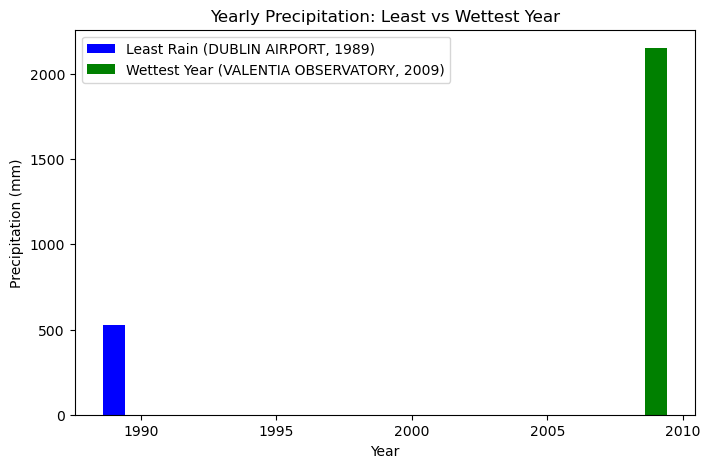

In [482]:

# Filtrar os dados para considerar apenas os valores de 'PRCPTOT' maiores que 0
allyear_df_clean = allyear_df[allyear_df['PRCPTOT'] > 0]

# Encontrar o ano com a menor precipitação total
least_rain_year = allyear_df_clean.loc[allyear_df_clean['PRCPTOT'].idxmin()]
# Encontrar o ano com a maior precipitação total
wettest_year = allyear_df.loc[allyear_df['PRCPTOT'].idxmax()]

# Extrair os valores para o gráfico
station_least = least_rain_year['station_id']
year_least = least_rain_year['year']
precipitation_least = least_rain_year['PRCPTOT']

station_wettest = wettest_year['station_id']
year_wettest = wettest_year['year']
precipitation_wettest = wettest_year['PRCPTOT']

# Plotando os dados
fig, ax = plt.subplots(figsize=(8, 5))

# Plotando as barras
ax.bar(year_least, precipitation_least, label=f'Least Rain ({station_least}, {year_least})', color='blue')
ax.bar(year_wettest, precipitation_wettest, label=f'Wettest Year ({station_wettest}, {year_wettest})', color='green')

# Títulos e rótulos
ax.set_title('Yearly Precipitation: Least vs Wettest Year')
ax.set_xlabel('Year')
ax.set_ylabel('Precipitation (mm)')
ax.legend()

# Exibindo o gráfico
plt.show()


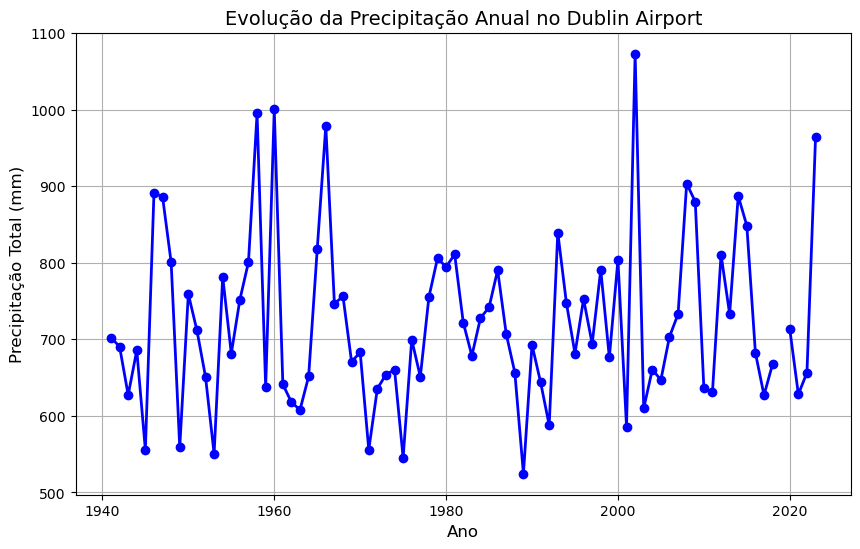

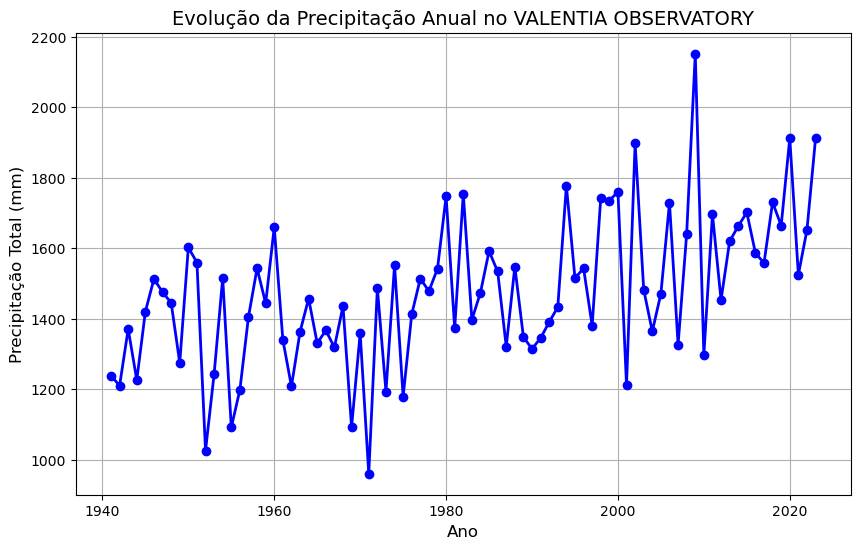

In [483]:


# Filtrar os dados para a estação 'DUBLIN AIRPORT'
dublin_df = allyear_df[allyear_df['station_id'] == 'DUBLIN AIRPORT']

plt.figure(figsize=(10, 6))
plt.plot(dublin_df['year'], dublin_df['PRCPTOT'], marker='o', color='blue', linestyle='-', linewidth=2, markersize=6)
plt.title('Evolução da Precipitação Anual no Dublin Airport', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Precipitação Total (mm)', fontsize=12)
plt.grid(True)
plt.show()

# Filtrar os dados para a estação 'DUBLIN AIRPORT'
valentina_df = allyear_df[allyear_df['station_id'] == 'VALENTIA OBSERVATORY']

plt.figure(figsize=(10, 6))
plt.plot(valentina_df['year'], valentina_df['PRCPTOT'], marker='o', color='blue', linestyle='-', linewidth=2, markersize=6)
plt.title('Evolução da Precipitação Anual no VALENTIA OBSERVATORY', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Precipitação Total (mm)', fontsize=12)
plt.grid(True)
plt.show()
